In [1]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os
import healpy as hp

import cartopy
from ulmo.analysis.spatial_plots import evals_to_healpix, evals_to_healpix_meds, show_med_LL

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# this should be run in JupyterHub

In [2]:
analysis_table = pandas.read_parquet('/home/jovyan/SST_L3S_VIIRS_2012.parquet')

In [3]:
eval_tbl = analysis_table
nside = 64
hpma, hp_lons, hp_lats, hp_values = evals_to_healpix_meds(eval_tbl, nside) # read table, evaulate log likelihood

/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


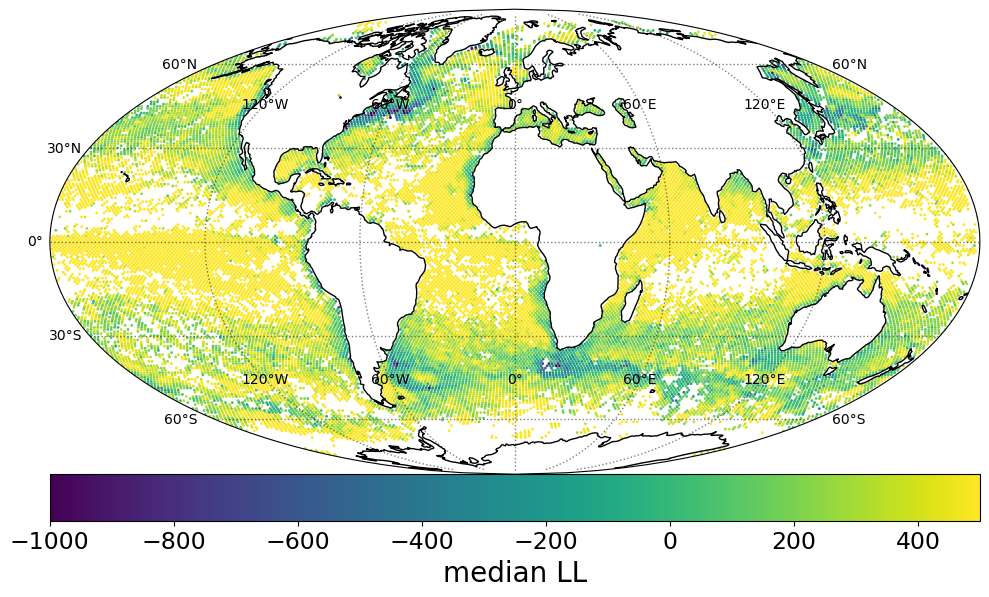

In [4]:
fig = plt.figure(figsize=(12,8)) # makes plot
color='viridis'
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap(color)
good = np.invert(hp_values.mask)
img = plt.scatter(x=hp_lons[good],
    y=hp_lats[good],
    c=hp_values[good], vmin = -1000, vmax = 500, 
    cmap=cm,
    s=1,
    transform=tformP)

    # Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
clbl = 'median LL'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

    # Coast lines

ax.coastlines(zorder=10)
ax.set_global()
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
        color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}
#gl.xlocator = mticker.FixedLocator([-180., -160, -140, -120, -60, -20.])
#gl.xlocator = mticker.FixedLocator([-240., -180., -120, -65, -60, -55, 0, 60, 120.])
#gl.ylocator = mticker.FixedLocator([0., 15., 30., 45, 60.])

plt.show()